In [2]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np


In [3]:
# load sounds
sound_file = "piano_c.wav"
sound, sr = librosa.load(sound_file)  # sr: sampling rate


In [9]:
ipd.Audio(sound_file)


Text(0.5, 1.0, 'Sound')

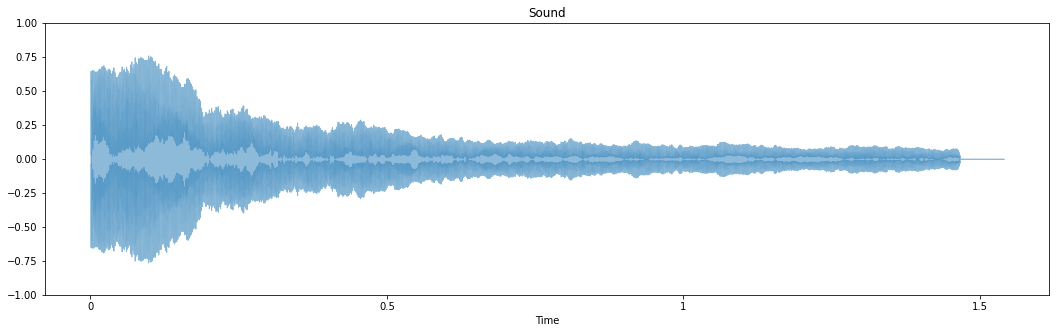

In [8]:
# Visualising audio signal in the time domain
plt.figure(figsize=(18, 5))
librosa.display.waveshow(sound, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Sound")


Text(0.5, 1.0, 'Amplitude Envelope')

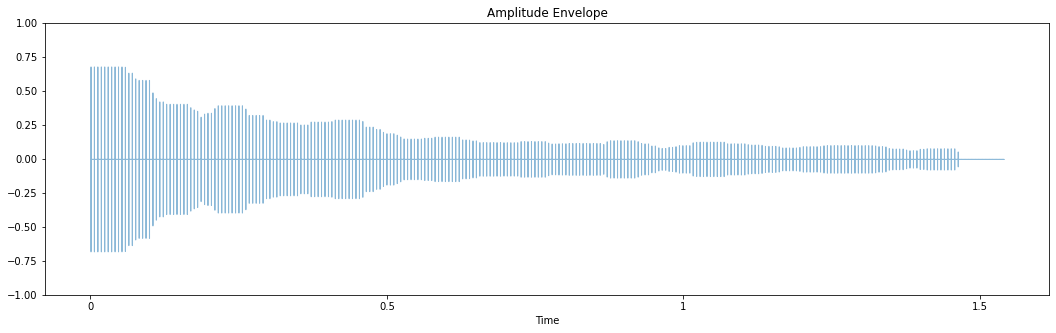

In [20]:
# Task 1
def amplitude_envelope(signal, frame_size, hop_length) -> np.ndarray:
    """Calculate the amplitude envelope of a signal with a given frame size and hpp_length."""
    # Hint: recall the definition of amplitude_envelope
    envelope = np.zeros(len(signal)) # array envelope初始化为0，其长度与输入信号相同的，其将存每个帧处取值
    for i in range(0, len(signal), hop_length): # 以hop_length的步长遍历信号，取到每个信号帧
        
        envelope[i] = np.max(signal[i:i + frame_size])# 取每个信号帧的最大值，在相应索处保存
    return envelope

# test amplitude_envelope
envelope = amplitude_envelope(sound, 1024, 128)
plt.figure(figsize=(18, 5))
librosa.display.waveshow(envelope, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Amplitude Envelope")

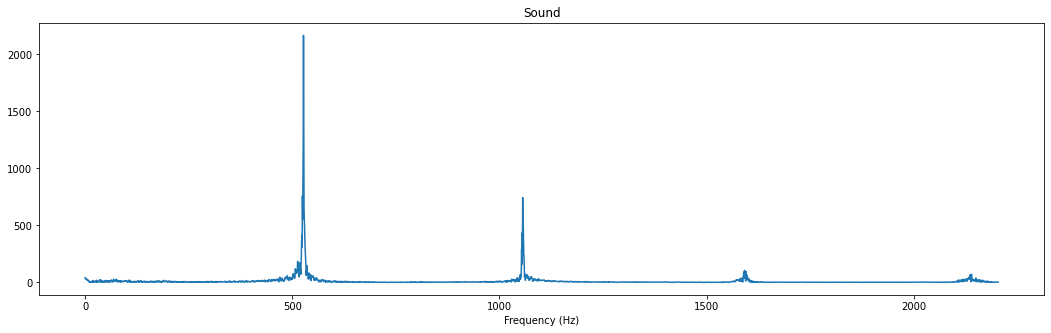

In [16]:
# Task 2
# Visualising audio signal in the frequency domain
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    """Time domain -> Frequency domain"""
    # Hint: calculate the FT of signal, then calculate the absolute value to get magnitude
    ftt = np.fft.fft(signal) # 使用numpy的fft函数对信号进行傅里叶变换，从而将信号从时域变换到频域
    magnitude = np.abs(ftt) # 取绝对值，得到幅度

    X_mag = magnitude[:int(len(magnitude) / f_ratio)]

    # make a plot
    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag) * f_ratio)

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

plot_magnitude_spectrum(sound, sr, "Sound", 0.1)

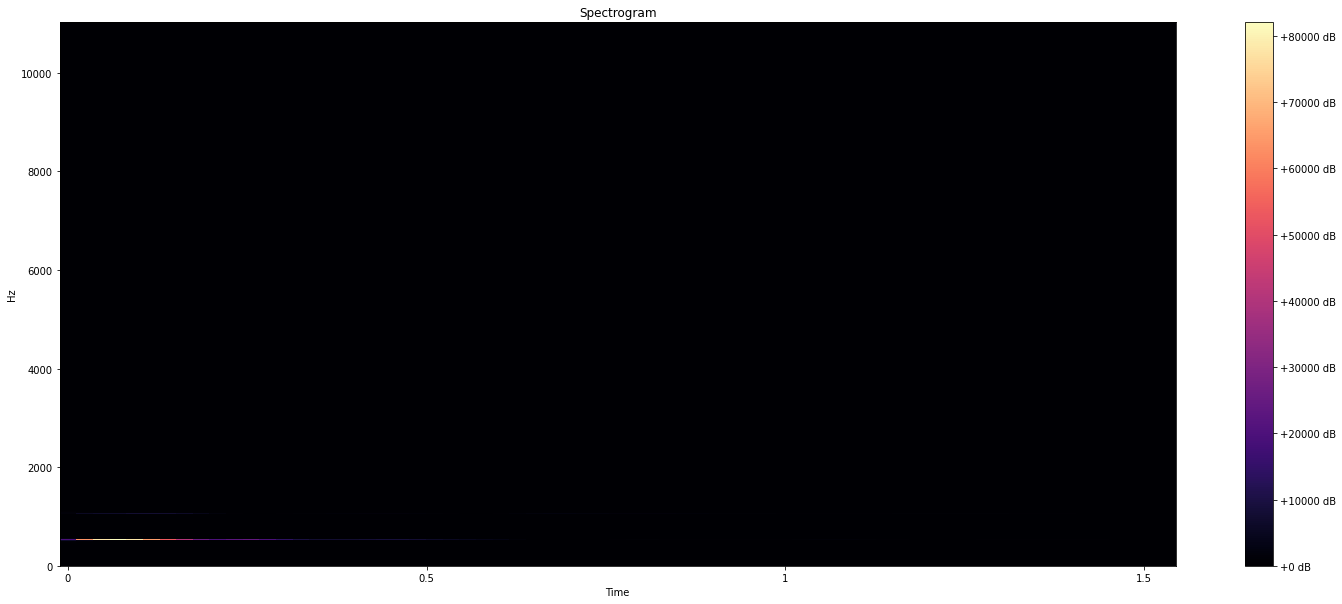

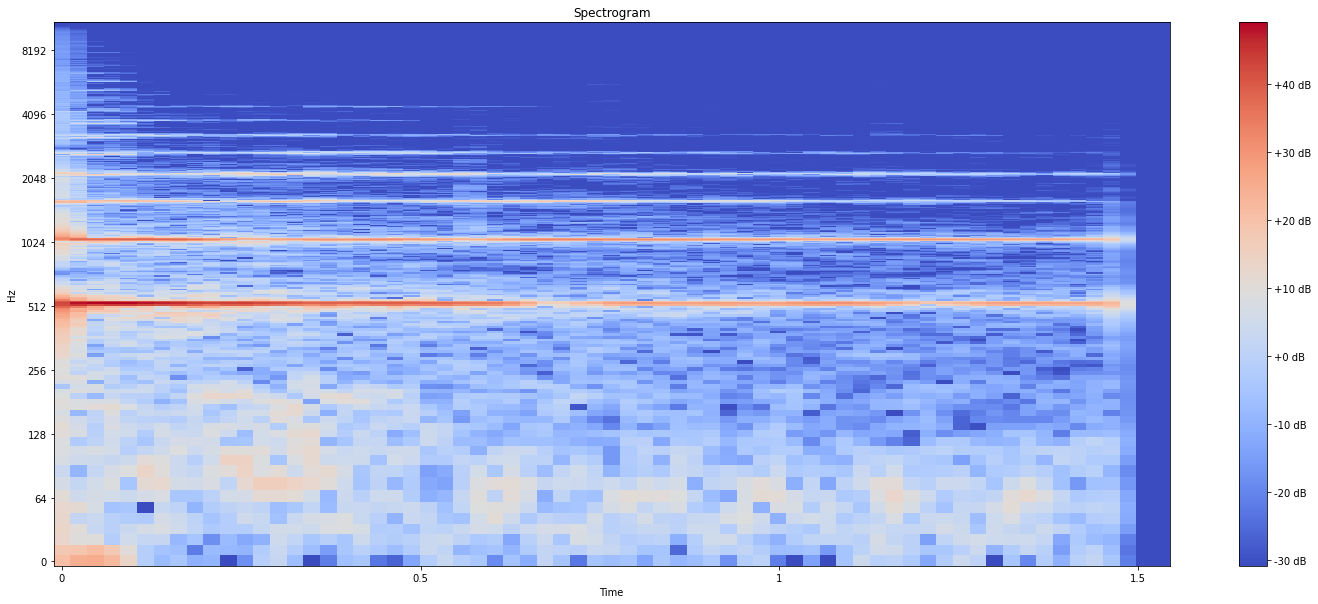

In [17]:
# Task 3
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    """Visualizing the spectrogram"""
    plt.figure(figsize=(25, 10))
    # Hint: y_axis choice: "linear", "log"
    # Hint: use librosa.display.specshow()
    librosa.display.specshow(Y, y_axis=y_axis, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()


FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(sound, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) # Extracting Short-Time Fourier Transform
Y_scale = np.abs(S_scale) ** 2  # Calculating the spectrogram
plot_spectrogram(Y_scale, sr, HOP_SIZE) # Visualizing the spectrogram
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE,y_axis='log') # Log-Frequency Spectrogram

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5500\3403880317.py:2: FutureWarning: Pass y=[-3.4209988e-01 -5.8172739e-01 -5.7146752e-01 ...  2.1207823e-06
 -3.9429947e-06 -7.9830879e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(


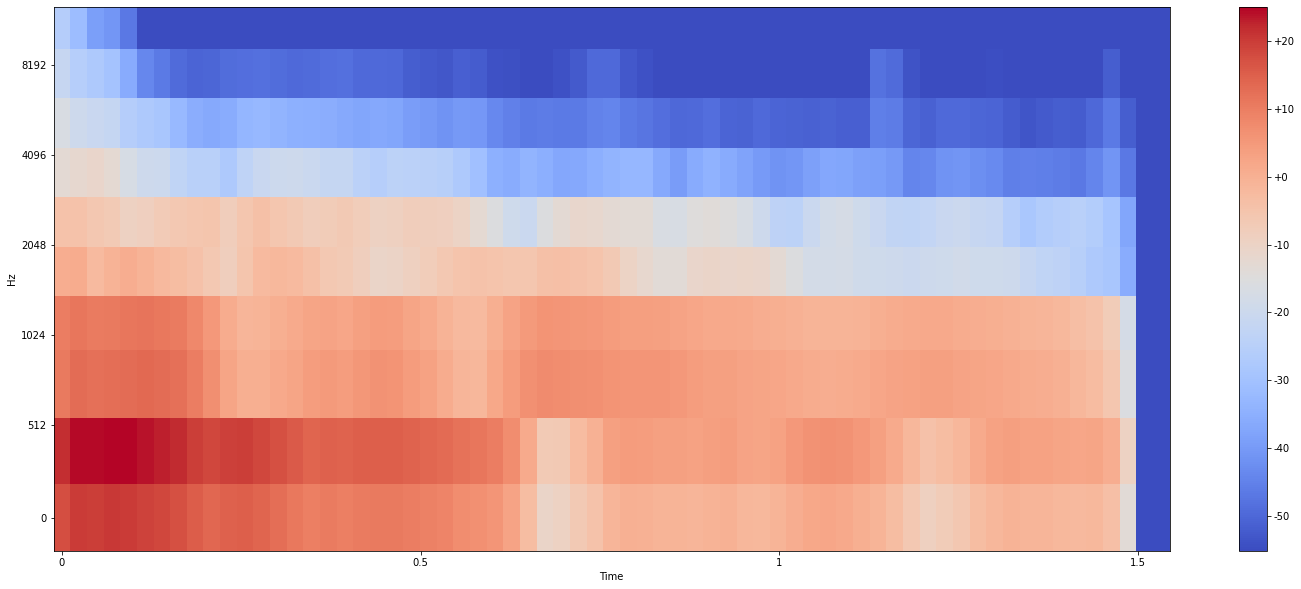

In [13]:
# Visualizing Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(
    sound, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5500\408564212.py:5: FutureWarning: Pass y=[-3.4209988e-01 -5.8172739e-01 -5.7146752e-01 ...  2.1207823e-06
 -3.9429947e-06 -7.9830879e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(Y, sr=sr, n_mfcc=n_mfcc)


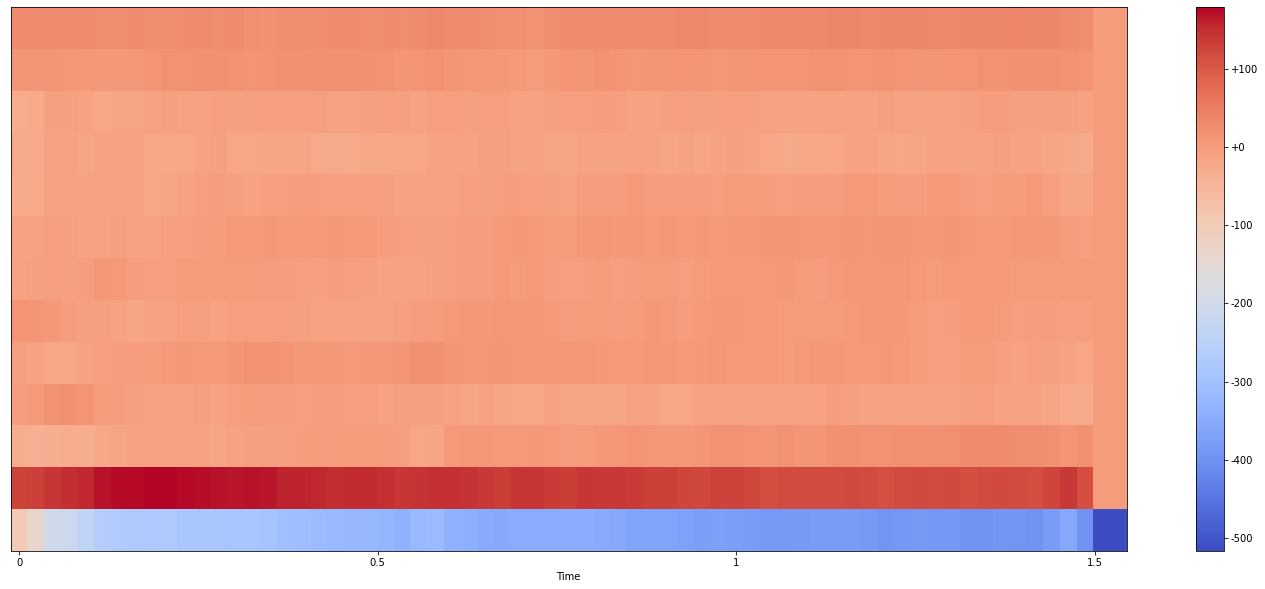

In [18]:
# Task 4
# Visualising MFCCs
def plot_mfccs(Y, sr, n_mfcc=13):
    # Hint: extract mfccs, use librosa.feature.mfcc()
    mfccs = librosa.feature.mfcc(Y, sr=sr, n_mfcc=n_mfcc)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs,
                             x_axis="time",
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

plot_mfccs(sound, sr)